In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
training_images.shape

(60000, 28, 28)

In [8]:
training_images.ndim

3

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
training_labels.shape

(60000,)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
labels = ["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandals", "shirt",
         "sneaker", "bag", "ankle boot"]

In [11]:
labels[8]

'bag'

In [12]:
training_images[45]

array([[  0,   0,   0,   1,   0,   0,   0,   0,   0,  34, 148, 202, 107,
         84, 162, 198,  90,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  21, 107, 166, 168, 152, 204, 238,
        248, 237, 190, 142, 178, 158,  98,  17,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  55, 188, 140, 131, 121, 119, 116, 146,
        157, 132, 115, 136, 125, 140, 143, 181,  51,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 167, 134, 113, 130, 134, 140, 132, 125,
        125, 131, 135, 130, 133, 131, 115, 135, 163,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 148, 133, 124, 134, 128, 135, 128, 133,
        130, 133, 137, 138, 130, 124, 130, 133, 147,  82,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,  86, 148, 158, 139, 124, 120, 131, 134, 132,
        134, 124, 134, 132, 137, 126, 137, 136, 146, 114,   0,   0,   0,
          0,   0],
       [  

In [13]:
training_images.min(), training_images.max()

(0, 255)

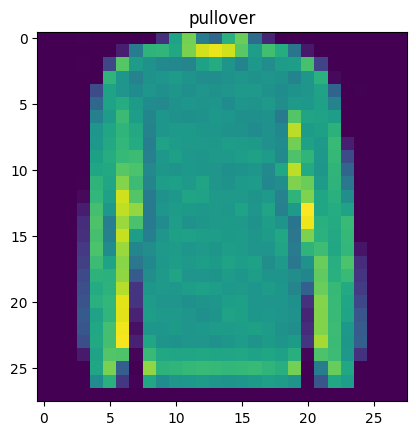

In [17]:
import matplotlib.pyplot as plt
plt.imshow(training_images[45])
plt.title(labels[training_labels[45]])
plt.show()

In [15]:
training_labels[45]

2

In [16]:
labels[2]

'pullover'

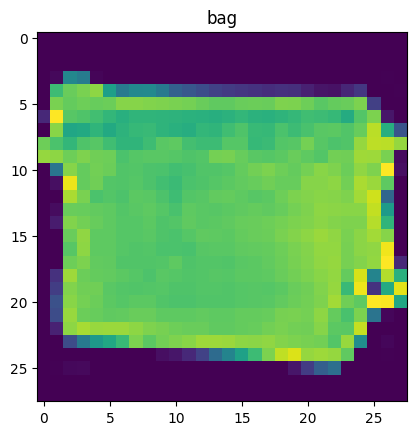

In [18]:
import matplotlib.pyplot as plt
plt.imshow(training_images[12345])
plt.title(labels[training_labels[12345]])
plt.show()

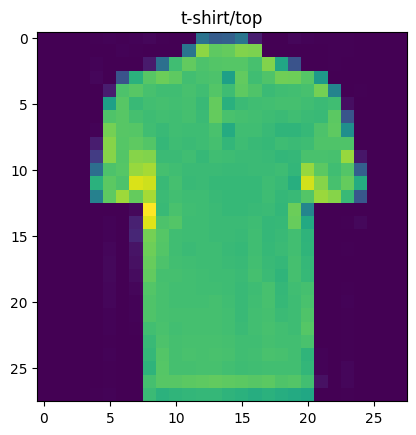

In [19]:
import matplotlib.pyplot as plt
plt.imshow(training_images[48978])
plt.title(labels[training_labels[48978]])
plt.show()

# Flatten (Applatir l'images)

In [20]:
training_images.shape

(60000, 28, 28)

In [21]:
a_training_images = training_images.reshape((60000, 28*28))
a_test_images = test_images.reshape((-1, 28*28))

In [22]:
a_training_images.shape, a_test_images.shape

((60000, 784), (10000, 784))

# One hot encoding

In [23]:
import numpy as np
x = np.array([1, 2, 1, 0, 3])

In [24]:
tf.keras.utils.to_categorical(x)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [25]:
training_labels.shape

(60000,)

In [26]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [27]:
training_labels.shape

(60000, 10)

In [28]:
training_labels[45]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Softmax

In [29]:
output = [6, 3, 2]

In [32]:
6/(6+3+2) + 3/(6+3+2) + 2/(6+3+2)

1.0

In [31]:
3/(6+3+2)

0.2727272727272727

In [33]:
6/(6+3+2)

0.5454545454545454

In [34]:
2/(6+3+2)

0.18181818181818182

In [35]:
import numpy as np

In [36]:
def softmax(vect):
  r = np.exp(np.array(vect))
  return r/sum(r)

In [37]:
softmax([6, 3, 2])

array([0.93623955, 0.04661262, 0.01714783])

In [ ]:
[1, 0, 0]

# 1er modèle de classification

In [42]:
## Normalisation

In [39]:
a_training_images.min(), a_training_images.max()

(0, 255)

In [40]:
a_training_images = a_training_images /255.0
a_test_images = a_test_images / 255.0

In [41]:
a_training_images.min(), a_training_images.max()

(0.0, 1.0)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [46]:
model = Sequential([ Dense(units=784, activation="sigmoid"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="mse", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0887 - accuracy: 0.2801 - val_loss: 0.0866 - val_accuracy: 0.3793
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0846 - accuracy: 0.4093 - val_loss: 0.0825 - val_accuracy: 0.4193
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0801 - accuracy: 0.4337 - val_loss: 0.0777 - val_accuracy: 0.4334
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0752 - accuracy: 0.4774 - val_loss: 0.0729 - val_accuracy: 0.4909
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872


In [ ]:
loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872

In [45]:
3/5

0.6

# MSE VS Cross-entropy ou Log loss

In [47]:
def mse(target, prediction):
  loss = (prediction-target) ** 2
  return loss

In [48]:
def log_loss(target, prediction):
  loss = - 1* np.log(prediction)
  return loss

In [49]:
prediction = np.arange(0, 1, 0.01)
prediction

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [50]:
target = np.ones_like(prediction)
target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
loss_mse = mse(target, prediction)
loss_ce = log_loss(target, prediction)

<ipython-input-48-9c0a04435e8a>:2: RuntimeWarning: divide by zero encountered in log
  loss = - 1* np.log(prediction)


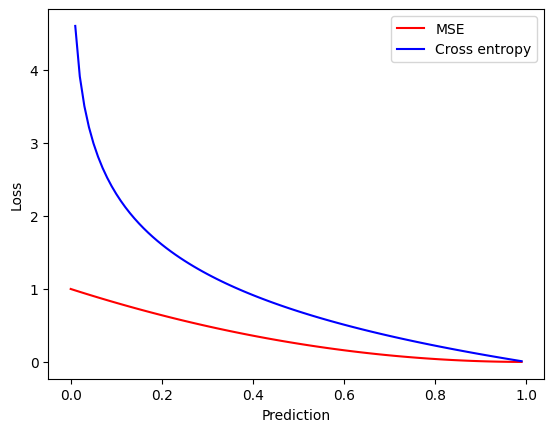

In [53]:
plt.plot(prediction, loss_mse, c='red', label='MSE')
plt.plot(prediction, loss_ce, c='blue', label="Cross entropy")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [54]:
def log_loss(target, prediction):
  loss = - 1* np.log(1-prediction)
  return loss

In [ ]:
np.zeros_like

In [55]:
target = np.zeros_like(prediction)
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
loss_mse = mse(target, prediction)
loss_ce = log_loss(target, prediction)

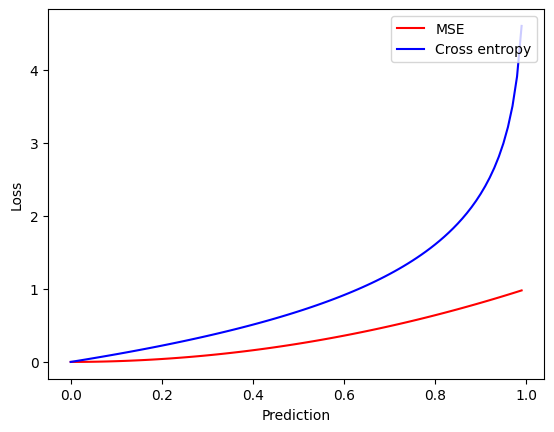

In [57]:
plt.plot(prediction, loss_mse, c='red', label='MSE')
plt.plot(prediction, loss_ce, c='blue', label="Cross entropy")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

# Entrainement avec cross entropy comme Loss

In [58]:
model = Sequential([ Dense(units=784, activation="sigmoid"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 1.1432 - accuracy: 0.6691 - val_loss: 0.7896 - val_accuracy: 0.7419
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7044 - accuracy: 0.7625 - val_loss: 0.6642 - val_accuracy: 0.7678
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6196 - accuracy: 0.7844 - val_loss: 0.6133 - val_accuracy: 0.7811
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5747 - accuracy: 0.8000 - val_loss: 0.5846 - val_accuracy: 0.7943
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5450 - accuracy: 0.8112 - val_loss: 0.5563 - val_accuracy: 0.8020


In [ ]:
 MSE : loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872

 CROSS ENTROPY : loss: 0.5450 - accuracy: 0.8112 - val_loss: 0.5563 - val_accuracy: 0.8020

# Nouvelle fonction d'activation : Relu

In [72]:
values = np.arange(-5, 5, 0.01)

In [73]:
sig = tf.nn.sigmoid(values)

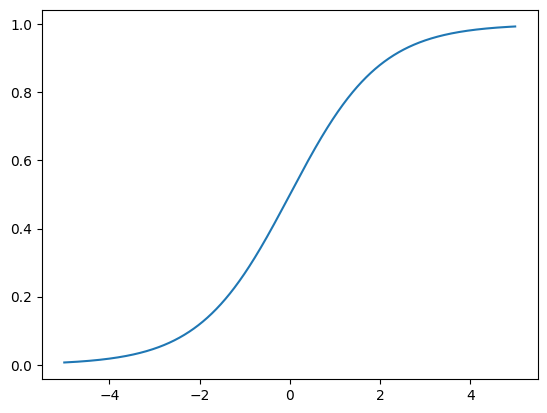

In [74]:
plt.plot(values, sig)
plt.show()

In [75]:
def relu(vect):
  return np.maximum(0, vect)

In [76]:
relu_values = relu(values)

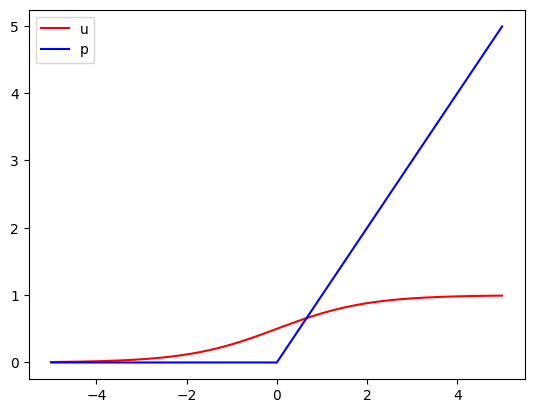

In [77]:
plt.plot(values, sig, c='r', label="sigmoid")
plt.plot(values, relu_values, c='b', label="Relu")
plt.legend("upper right")
plt.show()

In [78]:
model = Sequential([ Dense(units=784, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6885 - accuracy: 0.7804 - val_loss: 0.5556 - val_accuracy: 0.8083
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4937 - accuracy: 0.8322 - val_loss: 0.4874 - val_accuracy: 0.8320
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4522 - accuracy: 0.8454 - val_loss: 0.4615 - val_accuracy: 0.8374
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4274 - accuracy: 0.8526 - val_loss: 0.4563 - val_accuracy: 0.8376
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4099 - accuracy: 0.8585 - val_loss: 0.4308 - val_accuracy: 0.8479


In [ ]:
 MSE : loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872

 CROSS ENTROPY : loss: 0.5450 - accuracy: 0.8112 - val_loss: 0.5563 - val_accuracy: 0.8020

 Relu : loss: 0.4099 - accuracy: 0.8585 - val_loss: 0.4308 - val_accuracy: 0.8479

In [79]:
model = Sequential([ Dense(units=784, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6874 - accuracy: 0.7809 - val_loss: 0.5521 - val_accuracy: 0.8118
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4928 - accuracy: 0.8334 - val_loss: 0.4919 - val_accuracy: 0.8301
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4507 - accuracy: 0.8443 - val_loss: 0.4625 - val_accuracy: 0.8398
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4269 - accuracy: 0.8526 - val_loss: 0.4604 - val_accuracy: 0.8385
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4081 - accuracy: 0.8593 - val_loss: 0.4508 - val_accuracy: 0.8420
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3952 - accuracy: 0.8633 - val_loss: 0.4199 - val_accuracy: 0.8518
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3827 - accuracy: 0.8676 - val_loss: 0.4256 - val_ac

In [ ]:
 MSE : loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872

 CROSS ENTROPY : loss: 0.5450 - accuracy: 0.8112 - val_loss: 0.5563 - val_accuracy: 0.8020

 Relu : loss: 0.4099 - accuracy: 0.8585 - val_loss: 0.4308 - val_accuracy: 0.8479

 (20 epochs) : loss: 0.3009 - accuracy: 0.8936 - val_loss: 0.3549 - val_accuracy: 0.8744

# Réseau de neurones plus complexe

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [82]:
model = Sequential([ Dense(units=784, activation="relu"),
                    Dense(units=128, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6690 - accuracy: 0.7799 - val_loss: 0.5097 - val_accuracy: 0.8223
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4656 - accuracy: 0.8379 - val_loss: 0.4887 - val_accuracy: 0.8238
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4224 - accuracy: 0.8524 - val_loss: 0.4352 - val_accuracy: 0.8449
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3955 - accuracy: 0.8618 - val_loss: 0.4457 - val_accuracy: 0.8389
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3762 - accuracy: 0.8675 - val_loss: 0.4092 - val_accuracy: 0.8554
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3596 - accuracy: 0.8730 - val_loss: 0.3835 - val_accuracy: 0.8613
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3465 - accuracy: 0.8771 - val_loss: 0.3808 - val_

In [ ]:
 MSE : loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872

 CROSS ENTROPY : loss: 0.5450 - accuracy: 0.8112 - val_loss: 0.5563 - val_accuracy: 0.8020

 Relu : loss: 0.4099 - accuracy: 0.8585 - val_loss: 0.4308 - val_accuracy: 0.8479

 (20 epochs) : loss: 0.3009 - accuracy: 0.8936 - val_loss: 0.3549 - val_accuracy: 0.8744

 model complexe : loss: 0.2473 - accuracy: 0.9109 - val_loss: 0.3229 - val_accuracy: 0.8847

In [87]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 784)               615440    
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


In [85]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):


  plt.plot(list(range(len(history['loss']))), history['loss'], label = "loss")
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'], label="val_loss")
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.legend(loc='upper right')
  plt.show()

def plot_accuracy_curve(history):


  plt.plot(list(range(len(history['accuracy']))), history['accuracy'], label = "accuracy")
  plt.plot(list(range(len(history['val_accuracy']))), history['val_accuracy'], label="val_accuracy")
  plt.xlabel('Epochs')
  plt.ylabel("accuracy")
  plt.title("Accuracy Curve")
  plt.legend(loc='upper right')
  plt.show()


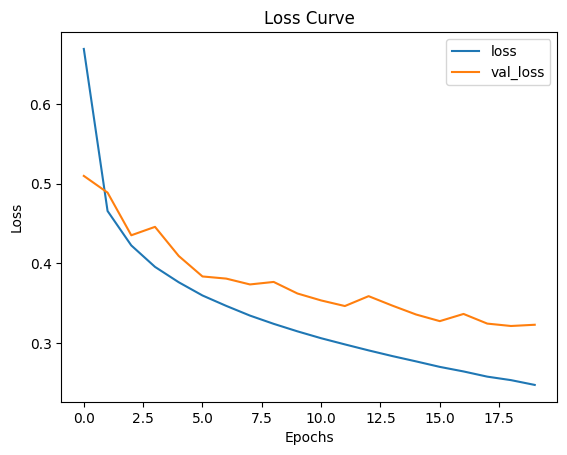

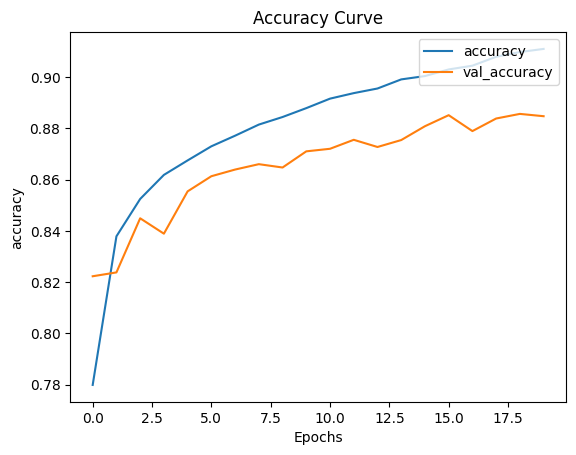

In [86]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

# Combattre le overfitting : Dropout

In [104]:
dropout = tf.keras.layers.Dropout(0.5, input_shape=(2,))

In [103]:
?tf.keras.layers.Dropout

In [100]:
x = np.arange(1,11).reshape(5, 2).astype(np.float32)

In [101]:
x

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]], dtype=float32)

In [105]:
dropout(x, training=True)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.,  4.],
       [ 0.,  8.],
       [10., 12.],
       [14.,  0.],
       [18., 20.]], dtype=float32)>

In [106]:
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8516 - accuracy: 0.7047 - val_loss: 0.5583 - val_accuracy: 0.8028
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5757 - accuracy: 0.7994 - val_loss: 0.4834 - val_accuracy: 0.8273
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5108 - accuracy: 0.8195 - val_loss: 0.4575 - val_accuracy: 0.8349
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4723 - accuracy: 0.8333 - val_loss: 0.4286 - val_accuracy: 0.8470
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4497 - accuracy: 0.8414 - val_loss: 0.4143 - val_accuracy: 0.8506
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4305 - accuracy: 0.8474 - val_loss: 0.4004 - val_accuracy: 0.8548
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4191 - accuracy: 0.8521 - val_loss: 0.3900 - val_ac

In [ ]:
 MSE : loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872

 CROSS ENTROPY : loss: 0.5450 - accuracy: 0.8112 - val_loss: 0.5563 - val_accuracy: 0.8020

 Relu : loss: 0.4099 - accuracy: 0.8585 - val_loss: 0.4308 - val_accuracy: 0.8479

 (20 epochs) : loss: 0.3009 - accuracy: 0.8936 - val_loss: 0.3549 - val_accuracy: 0.8744

 model complexe : loss: 0.2473 - accuracy: 0.9109 - val_loss: 0.3229 - val_accuracy: 0.8847

 Dropout : loss: 0.3238 - accuracy: 0.8834 - val_loss: 0.3361 - val_accuracy: 0.8800

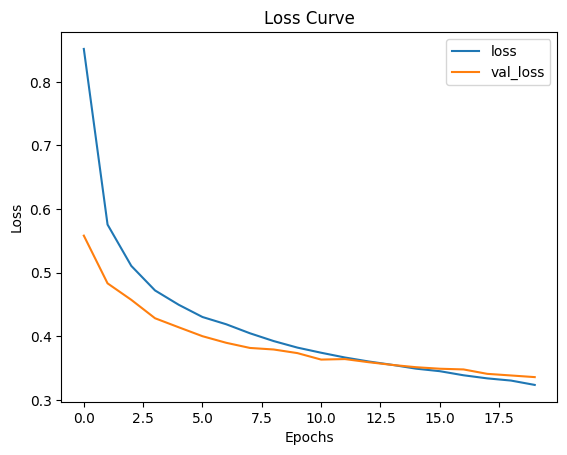

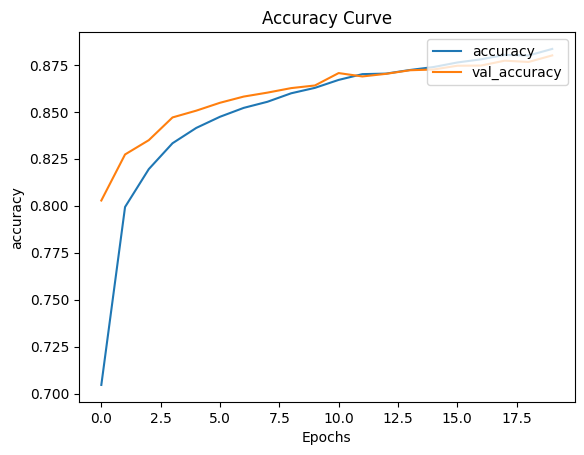

In [107]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

# Adam optimiser

In [108]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999)

In [109]:
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9975 - accuracy: 0.6430 - val_loss: 0.6907 - val_accuracy: 0.7461
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.9351 - accuracy: 0.6611 - val_loss: 0.6602 - val_accuracy: 0.7576
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9030 - accuracy: 0.6747 - val_loss: 0.6268 - val_accuracy: 0.7848
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8844 - accuracy: 0.6834 - val_loss: 0.6436 - val_accuracy: 0.7811
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.8953 - accuracy: 0.6739 - val_loss: 0.6872 - val_accuracy: 0.7250
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.8824 - accuracy: 0.6829 - val_loss: 0.6423 - val_accuracy: 0.7865
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8938 - accuracy: 0.6778 - val_loss: 0.6820 -

In [ ]:
 MSE : loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872

 CROSS ENTROPY : loss: 0.5450 - accuracy: 0.8112 - val_loss: 0.5563 - val_accuracy: 0.8020

 Relu : loss: 0.4099 - accuracy: 0.8585 - val_loss: 0.4308 - val_accuracy: 0.8479

 (20 epochs) : loss: 0.3009 - accuracy: 0.8936 - val_loss: 0.3549 - val_accuracy: 0.8744

 model complexe : loss: 0.2473 - accuracy: 0.9109 - val_loss: 0.3229 - val_accuracy: 0.8847

 Dropout : loss: 0.3238 - accuracy: 0.8834 - val_loss: 0.3361 - val_accuracy: 0.8800

 Adam : loss: 0.8879 - accuracy: 0.6822 - val_loss: 0.6868 - val_accuracy: 0.7686

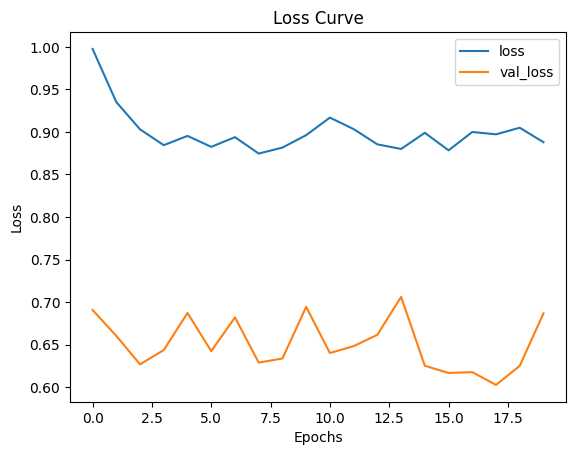

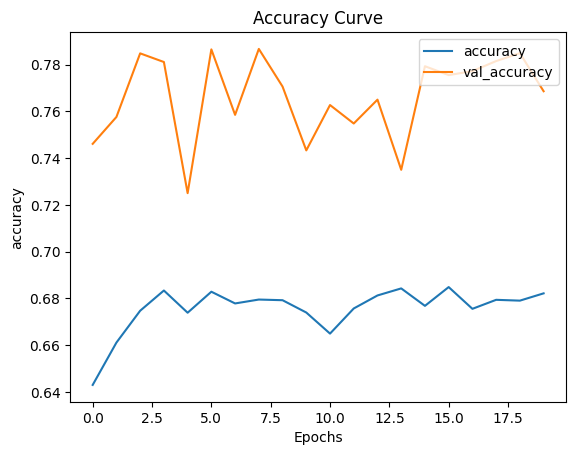

In [110]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

# Model Checkpoint

In [111]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [115]:
best_model = "best_model.h5"

model_ckp = ModelCheckpoint(filepath=best_model,
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)

In [116]:
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels,
              epochs=30,
              validation_data=(a_test_images, test_labels),
              callbacks =[model_ckp])

Epoch 1/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8577 - accuracy: 0.7032 - val_loss: 0.5608 - val_accuracy: 0.8027
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5766 - accuracy: 0.8007 - val_loss: 0.4839 - val_accuracy: 0.8303
Epoch 3/30
 582/1875 [========>.....................] - ETA: 8s - loss: 0.5272 - accuracy: 0.8156

KeyboardInterrupt: ignored

In [117]:
model_save = tf.keras.models.load_model('best_model.h5')

In [118]:
model_save.evaluate(a_test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.4839 - accuracy: 0.8303


[0.48390501737594604, 0.830299973487854]

# Early Stopping

In [119]:
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)

In [121]:
model_ckp

In [122]:
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels,
              epochs=1000,
              validation_data=(a_test_images, test_labels),
              callbacks =[model_ckp, stop])

Epoch 1/1000
1875/1875 [==============================] - 20s 10ms/step - loss: 0.8654 - accuracy: 0.7017 - val_loss: 0.5572 - val_accuracy: 0.8084
Epoch 2/1000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5810 - accuracy: 0.8000 - val_loss: 0.4867 - val_accuracy: 0.8255
Epoch 3/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5135 - accuracy: 0.8205 - val_loss: 0.4501 - val_accuracy: 0.8402
Epoch 4/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4764 - accuracy: 0.8321 - val_loss: 0.4339 - val_accuracy: 0.8443
Epoch 5/1000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4489 - accuracy: 0.8411 - val_loss: 0.4139 - val_accuracy: 0.8503
Epoch 6/1000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4297 - accuracy: 0.8472 - val_loss: 0.4004 - val_accuracy: 0.8552
Epoch 7/1000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4160 - accuracy: 0.8529 - val_loss: 

In [ ]:
 MSE : loss: 0.0704 - accuracy: 0.5393 - val_loss: 0.0682 - val_accuracy: 0.5872

 CROSS ENTROPY : loss: 0.5450 - accuracy: 0.8112 - val_loss: 0.5563 - val_accuracy: 0.8020

 Relu : loss: 0.4099 - accuracy: 0.8585 - val_loss: 0.4308 - val_accuracy: 0.8479

 (20 epochs) : loss: 0.3009 - accuracy: 0.8936 - val_loss: 0.3549 - val_accuracy: 0.8744

 model complexe : loss: 0.2473 - accuracy: 0.9109 - val_loss: 0.3229 - val_accuracy: 0.8847

 Dropout : loss: 0.3238 - accuracy: 0.8834 - val_loss: 0.3361 - val_accuracy: 0.8800

 Adam : loss: 0.8879 - accuracy: 0.6822 - val_loss: 0.6868 - val_accuracy: 0.7686

 Callbacks : loss: 0.3065 - accuracy: 0.8892 - val_loss: 0.3300 - val_accuracy: 0.8801

# Predictions

In [129]:
model_save = tf.keras.models.load_model('best_model.h5')

In [130]:
model_save.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 784)               615440    
                                                                 
 dropout_11 (Dropout)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               100480    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


In [152]:
a_test_images[0].shape

(784,)

In [153]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [154]:
np.argmax(test_labels[0])

9

In [155]:
labels[9]

'ankle boot'

In [159]:
pred = model_save.predict(a_test_images[9].reshape((1, 784)))

1/1 [==============================] - 0s 58ms/step


In [160]:
pred

array([[2.4781441e-06, 1.1213738e-06, 5.3914073e-07, 7.9470119e-06,
        1.5820679e-06, 1.7243681e-03, 9.9358454e-07, 9.9772078e-01,
        9.8825753e-05, 4.4121742e-04]], dtype=float32)

In [161]:
np.argmax(pred)

7

In [162]:
labels[7]

'sneaker'

In [ ]:
pred = model.predict(a_test_images[9].reshape((1, 784)))

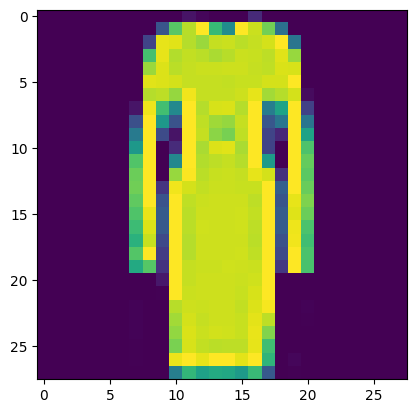

In [143]:
import matplotlib.pyplot as plt
plt.imshow(training_images[2500])
# plt.title(labels[training_labels[45]])
plt.show()

In [ ]:
(60000, 784) (1, 784)